# QUESTION 1

## DECISION TREE 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingClassifier


In [4]:
df = pd.read_csv("C:/Users/irem/Desktop/CarSeats_Dataset.CSV")

In [5]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [6]:
# first drop null values
df=df.dropna()
df.info()
# there's no null value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 37.5+ KB


In [7]:
# Creating dummmy variables for categorical variables

dummies= pd.get_dummies(data=df, columns=['US', 'ShelveLoc',"Urban"])
df_new = dummies.drop(["ShelveLoc_Medium","Urban_No","US_No"], axis=1).astype('float64')

In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 12 columns):
Sales             400 non-null float64
CompPrice         400 non-null float64
Income            400 non-null float64
Advertising       400 non-null float64
Population        400 non-null float64
Price             400 non-null float64
Age               400 non-null float64
Education         400 non-null float64
US_Yes            400 non-null float64
ShelveLoc_Bad     400 non-null float64
ShelveLoc_Good    400 non-null float64
Urban_Yes         400 non-null float64
dtypes: float64(12)
memory usage: 40.6 KB


In [9]:
# X'i scale etmeye gerek var mı?

In [10]:
X = df_new.drop(["Sales"], axis=1)
y = df_new.Sales

In [11]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
# creating the model

model = DecisionTreeRegressor(random_state=1)
model.fit(X_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [13]:
y_pred1 = model.predict(X_test)
test_score = mean_squared_error(y_test, y_pred1)
print('Test set score: {:.3f}'.format(test_score))

Test set score: 5.912


In [ ]:
#Visualizing the Decision Tree



In [ ]:
# Use CV to determine the optimal parameters

In [14]:
params_dt = {"max_depth": np.linspace(1,20,20),
"min_samples_split":np.linspace(0.001,1.0,20),
            "max_features" : ["auto", "sqrt", "log2"]
            }

In [15]:
from sklearn.model_selection import GridSearchCV

grid_dt = GridSearchCV(estimator=model,
                       param_grid=params_dt,  scoring='neg_mean_squared_error',
                       cv=10)

In [16]:
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.]), 'min_samples_split': array([0.001  , 0.05358, 0.10616, 0.15874, 0.21132, 0.26389, 0.31647,
       0.36905, 0.42163, 0.47421, 0.52679, 0.57937, 0.63195, 0.68453,
       0.73711, 0.78968, 0.84226, 0.89484, 0.94742, 1.     ]), 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [17]:
best_model = grid_dt.best_estimator_

y_pred = best_model.predict(X_test)

test_score = mean_squared_error(y_test, y_pred)

# Print test_roc_auc
print('Test set score: {:.3f}'.format(test_score))

Test set score: 5.268


In [18]:
print(grid_dt.best_params_)

{'max_depth': 12.0, 'max_features': 'auto', 'min_samples_split': 0.05357894736842105}


In [19]:
model_updated = DecisionTreeRegressor(max_depth=12.0, max_features="auto", min_samples_split= 0.05357894736842105,
                                     random_state=1)
model_updated.fit(X_train, y_train)
y_pred2 = model_updated.predict(X_test)

test_score = mean_squared_error(y_test, y_pred2)
print('Test set score: {:.3f}'.format(test_score))

Test set score: 5.268


## RANDOM FOREST 

In [34]:
Random_Forest = RandomForestRegressor(random_state=1)


# çalışması çok uzun sürdüğü için biraz azalttım linspacetekileri

params_rf = {"n_estimators": [100,200,300,400,500,600,700,800,900],
            #"max_features":['log2', 'auto', 'sqrt'],
             "max_depth": np.linspace(1,10,10),
                "min_samples_leaf": np.linspace(0.001,0.5,5) ,
            "min_samples_split":np.linspace(0.001,1.0,5)}


In [35]:
grid_rf = GridSearchCV(estimator=Random_Forest,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

In [36]:
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 2250 candidates, totalling 6750 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 6750 out of 6750 | elapsed: 38.9min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900], 'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), 'min_samples_leaf': array([0.001  , 0.12575, 0.2505 , 0.37525, 0.5    ]), 'min_samples_split': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [42]:
# Extract the best estimator
best_model = grid_rf.best_estimator_

In [43]:
y_pred_rf = best_model.predict(X_test)

In [40]:
test_score_rf = mean_squared_error(y_test, y_pred_rf)
print('Test set score: {:.3f}'.format(test_score_rf))

Test set score: 3.233


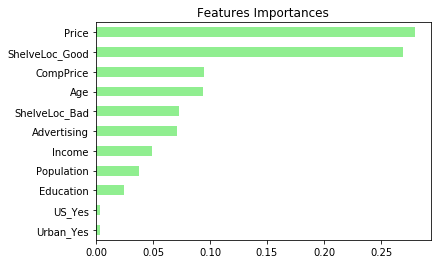

In [45]:
# Create a pd.Series of features importances
importances = pd.Series(data=grid_rf.best_estimator_.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()